In [10]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install geopandas matplotlib mapclassify

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [13]:
df = pd.read_excel("C:\Git_test\Project 2 Docs\Data Sets\Spendingbypostcode.xlsx", sheet_name="UK postal district spend", header=1)

df
df.shape

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\David\AppData\Local\Temp\ipykernel_45476\2559124727.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_excel("C:\Git_test\Project 2 Docs\Data Sets\Spendingbypostcode.xlsx", sheet_name="UK postal district spend", header=1)


(263590, 9)

In [14]:
df.head(10)

,Time period,Postal district,Time of day,Food & grocery,Health care,Other,QSR,Restaurants,Retail goods & services
0,2019Q1,AB10,Morning,41.4,NaN,53.1,2.6,2.9,NaN
1,2019Q1,AB10,Lunchtime,42.1,NaN,50.2,2.5,5.2,NaN
2,2019Q1,AB10,Afternoon,44.8,NaN,46.5,2.4,6.3,NaN
3,2019Q1,AB10,Evening,46.8,NaN,24.1,3.3,25.8,NaN
4,2019Q1,AB10,Night,17.4,NaN,12.1,3.7,66.8,NaN
5,2019Q1,AB11,Morning,12.2,NaN,69.7,2.7,4.6,10.9
6,2019Q1,AB11,Lunchtime,9.0,NaN,68.2,2.0,7.9,12.9
7,2019Q1,AB11,Afternoon,9.2,NaN,66.6,1.7,10.3,12.3
8,2019Q1,AB11,Evening,10.5,NaN,33.9,2.7,48.1,4.8
9,2019Q1,AB11,Night,3.7,NaN,10.0,1.6,82.1,2.6


In [15]:
print(df.columns)

Index(['Time period', 'Postal district', 'Time of day', 'Food & grocery',
       'Health care', 'Other', 'QSR', 'Restaurants',
       'Retail goods & services'],
      dtype='object')


In [16]:
df.columns = df.columns.str.strip().str.title()
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Time Period', 'Postal District', 'Time Of Day', 'Food & Grocery',
       'Health Care', 'Other', 'Qsr', 'Restaurants',
       'Retail Goods & Services'],
      dtype='object')>

In [17]:
Last_quater_date = df[df['Time Period'].str.contains('Q', na=False)].index.max()

Last_quater_date

263589

In [18]:
print(list(enumerate(df.columns)))

[(0, 'Time Period'), (1, 'Postal District'), (2, 'Time Of Day'), (3, 'Food & Grocery'), (4, 'Health Care'), (5, 'Other'), (6, 'Qsr'), (7, 'Restaurants'), (8, 'Retail Goods & Services')]


In [19]:
df.tail(5)

,Time Period,Postal District,Time Of Day,Food & Grocery,Health Care,Other,Qsr,Restaurants,Retail Goods & Services
263585,2024Q2,ZE2,Morning,NaN,NaN,91.2,NaN,7.2,1.6
263586,2024Q2,ZE2,Lunchtime,NaN,NaN,88.9,NaN,8.2,2.8
263587,2024Q2,ZE2,Afternoon,NaN,NaN,91.1,NaN,6.6,2.4
263588,2024Q2,ZE2,Evening,NaN,NaN,82.8,NaN,16.4,0.9
263589,2024Q2,ZE2,Night,NaN,NaN,82.6,NaN,17.4,0.0


In [20]:
df['District'] = df['Postal District'].str.split().str[0].str.strip()

In [21]:
df['Time Of Day'].isna().sum()

0

In [22]:
time_of_day_values = ['Morning', 'Lunchtime', 'Afternoon', 'Evening', 'Night']

In [ ]:
cols = df.columns[3:9] 
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [24]:
mask = df['Time Of Day'].isin(time_of_day_values)


In [25]:
mean_by_postcode  = df[mask].groupby('District')[cols].mean()

In [26]:
global_means = df[cols].mean()

In [27]:
for col in cols:
    district_fill = df['District'].map(mean_by_postcode[col])
    final_fill = district_fill.fillna(global_means[col])
    df[col] = df[col].fillna(final_fill)


In [28]:
df.iloc[:, 3:9].isna().sum()

Food & Grocery             0
Health Care                0
Other                      0
Qsr                        0
Restaurants                0
Retail Goods & Services    0
dtype: int64

In [ ]:

print("1. mask.sum():", mask.sum())
print("2. Districts in filtered data:", df[mask]['District'].nunique())
print("3. mean_by_postcode shape:", mean_by_postcode.shape)
print("4. mean_by_postcode.head():\n", mean_by_postcode.head())


for col in cols:
    district_fill = df['District'].map(mean_by_postcode[col])
    print(f"\nFilling {col}:")
    print(" Total NaNs:", district_fill.isna().sum())
    df[col] = df[col].fillna(district_fill).fillna(global_means[col])


1. mask.sum(): 263590
2. Districts in filtered data: 2630
3. mean_by_postcode shape: (2630, 6)
4. mean_by_postcode.head():
           Food & Grocery  Health Care      Other       Qsr  Restaurants  \
District                                                                  
AB10           37.200000     5.965000  48.874545  4.488182    21.814545   
AB11           14.073846          NaN  53.005455  4.026667    27.970476   
AB12           41.715000     1.486667  77.447619  3.641905     2.503000   
AB14                 NaN          NaN  79.109000       NaN    27.854667   
AB15           27.966667     5.376000  73.941818  0.960000    11.345000   

          Retail Goods & Services  
District                           
AB10                     5.836923  
AB11                     8.951000  
AB12                          NaN  
AB14                          NaN  
AB15                     3.387368  

Global means:
 Food & Grocery             30.994394
Health Care                 3.690040
Other   

In [30]:
df.drop('District', axis=1, inplace=True)

In [31]:
df['Time Of Day'].isna().sum()

0

In [32]:
df['Postal District'].isna().sum()

0

In [33]:
df.reset_index(drop=True)

,Time Period,Postal District,Time Of Day,Food & Grocery,Health Care,Other,Qsr,Restaurants,Retail Goods & Services
0,2019Q1,AB10,Morning,41.400000,5.965000,53.1,2.600,2.9,5.836923
1,2019Q1,AB10,Lunchtime,42.100000,5.965000,50.2,2.500,5.2,5.836923
2,2019Q1,AB10,Afternoon,44.800000,5.965000,46.5,2.400,6.3,5.836923
3,2019Q1,AB10,Evening,46.800000,5.965000,24.1,3.300,25.8,5.836923
4,2019Q1,AB10,Night,17.400000,5.965000,12.1,3.700,66.8,5.836923
...,...,...,...,...,...,...,...,...,...
263585,2024Q2,ZE2,Morning,18.863158,3.699688,91.2,0.868,7.2,1.600000
263586,2024Q2,ZE2,Lunchtime,18.863158,3.699688,88.9,0.868,8.2,2.800000
263587,2024Q2,ZE2,Afternoon,18.863158,3.699688,91.1,0.868,6.6,2.400000
263588,2024Q2,ZE2,Evening,18.863158,3.699688,82.8,0.868,16.4,0.900000


In [34]:
df.to_excel('path/to/your/file.xlsx', index=True)

OSError: Cannot save file into a non-existent directory: 'path\to\your'

In [ ]:
gdf = gdf.merge(df, left_on='RGN21NM', right_on='Region', how='left')  

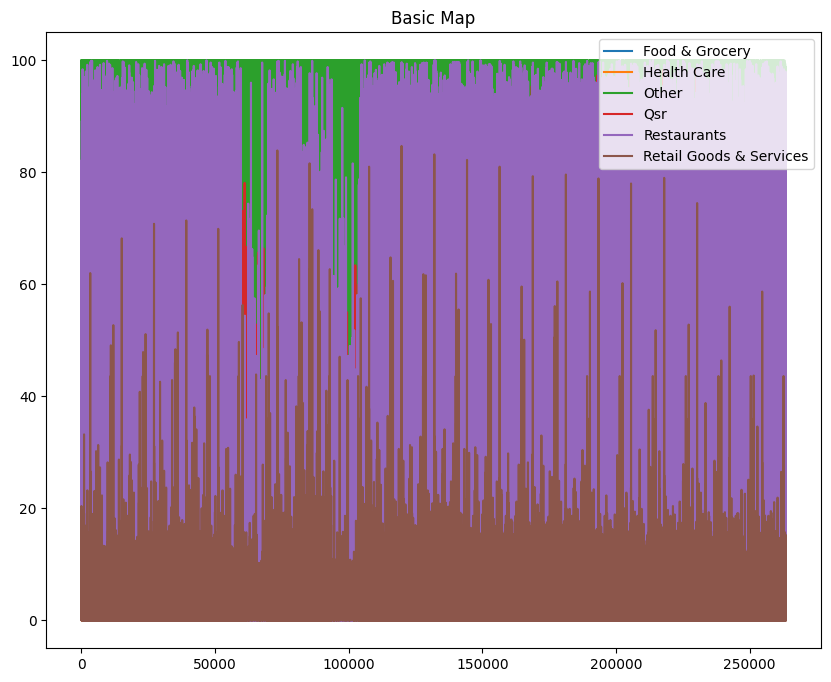

AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

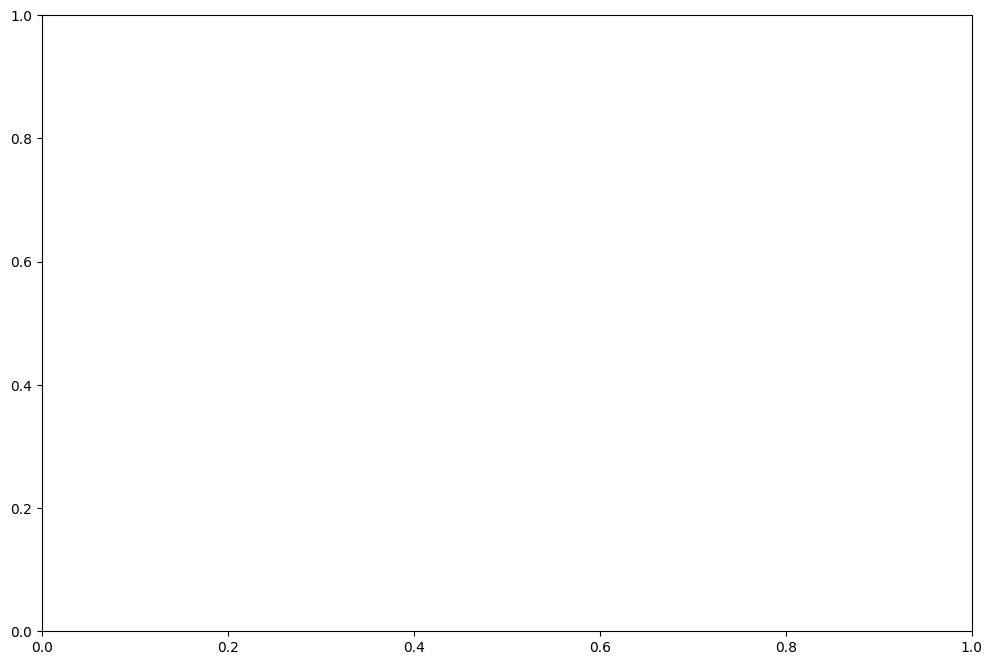

In [ ]:

gdf.plot(figsize=(10, 12))
plt.title('UK Regions')
plt.axis('off')
plt.show()


gdf.plot(column='Total Expenditure',  
         cmap='YlOrRd',
         legend=True,
         figsize=(10, 12),
         edgecolor='black',
         linewidth=0.8)
plt.title('UK Regional Expenditure')
plt.axis('off')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18, 10))

gdf.plot(ax=ax[0], color='lightblue', edgecolor='black')
ax[0].set_title('UK Regions')
ax[0].axis('off')

gdf.plot(column='Total Expenditure', ax=ax[1], legend=True, cmap='viridis', edgecolor='black')
ax[1].set_title('Expenditure by Region')
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df.to_excel('path/to/your/file.xlsx', index=True)